In [1]:
%load_ext rpy2.ipython

In [2]:
%%R
library(phyloseq)
library(plyr)
library(dplyr); library(tidyr)
library(ggplot2)
library(RColorBrewer)

/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: 
Attaching package: ‘dplyr’


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following objects are masked from ‘package:stats’:

    filter, lag


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


  res = super(Function, self).__call__(*new_args, **new_kwargs)


In [3]:
%%R
physeq = import_biom("../data/otu_table_tax_no211_meta.biom", parseFunction=parse_taxonomy_greengenes)

In [4]:
%%R
mdf = psmelt(physeq)

In [5]:
%%R
head(mdf)

          OTU Sample Abundance Plants DayAmdmt Amdmt ID Day  Kingdom
102339 OTU.18   S147     11235      0       12     2  F   1 Bacteria
376704  OTU.4   S142      8998      0       12     2  F   1 Bacteria
376670  OTU.4   S143      8803      0       12     2  F   1 Bacteria
102319 OTU.18   S144      7370      0       12     2  F   1 Bacteria
14      OTU.1   S203      6940      1       20     0  C   2 Bacteria
376740  OTU.4   S144      6755      0       12     2  F   1 Bacteria
               Phylum               Class             Order             Family
102339 Proteobacteria Gammaproteobacteria Enterobacteriales Enterobacteriaceae
376704 Proteobacteria  Betaproteobacteria   Burkholderiales   Oxalobacteraceae
376670 Proteobacteria  Betaproteobacteria   Burkholderiales   Oxalobacteraceae
102319 Proteobacteria Gammaproteobacteria Enterobacteriales Enterobacteriaceae
14     Proteobacteria Alphaproteobacteria  Sphingomonadales  Sphingomonadaceae
376740 Proteobacteria  Betaproteobacteria  

In [10]:
%%R
d = d.plot %>%
    dplyr::group_by(Phylum) %>%
    dplyr::summarize(Abundance = sum(Abundance))
Porder = na.omit(d$Phylum[order(-d$Abundance)])
Porder

 [1] Proteobacteria   Acidobacteria    Actinobacteria   Bacteroidetes   
 [5] Planctomycetes   Verrucomicrobia  Chloroflexi      Gemmatimonadetes
 [9] Firmicutes       Nitrospirae      Armatimonadetes  WS3             
[13] Cyanobacteria    Elusimicrobia    AD3              FBP             
[17] Fibrobacteres    [Thermi]         WPS-2            Chlorobi        
[21] Spirochaetes     BRC1             FCPU426          TM6             
[25] WS2              TM7              OD1              OP3             
[29] GAL15            OP11             Tenericutes      Chlamydiae      
[33] BHI80-139        NKB19            Kazan-3B-28      GN04            
[37] SBR1093          MVP-21           GN02            
39 Levels: Acidobacteria Actinobacteria AD3 Armatimonadetes ... WS3


### Stacked bar

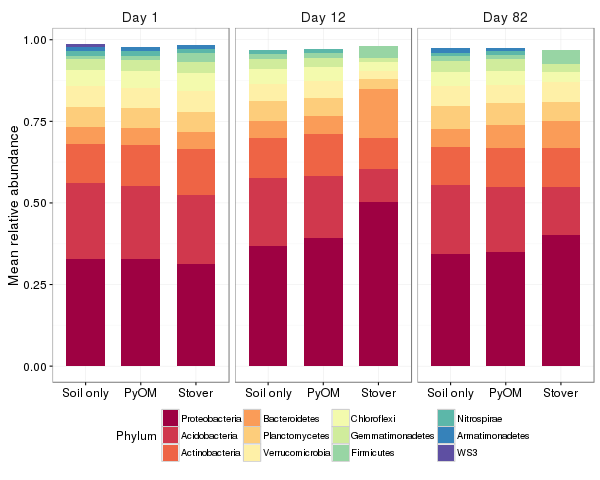

In [14]:
%%R -w 600

cutoff = 0.01
d.plot = mdf %>%
    dplyr::group_by(DayAmdmt) %>%
    dplyr::mutate(Abundance = Abundance / sum(Abundance)) %>%
    dplyr::group_by(Phylum, Amdmt, Day, DayAmdmt) %>%
    dplyr::summarize(Abundance = sum(Abundance)) %>%
    dplyr::filter(Abundance > cutoff) %>%
    dplyr::arrange(Day,Amdmt,Abundance)

d.plot$Phylum = factor(d.plot$Phylum, levels = Porder)
d.plot = d.plot[with(d.plot, order(d.plot$Phylum)),]
d.plot$Day = ifelse(d.plot$Day==1,"Day 12",ifelse(d.plot$Day==2,"Day 82","Day 1"))
d.plot$Amdmt = ifelse(d.plot$Amdmt==1,"PyOM",ifelse(d.plot$Amdmt==2,"Stover","Soil only"))
d.plot$Amdmt = factor(d.plot$Amdmt, levels = c("Soil only", "PyOM", "Stover"))

p = ggplot(d.plot, aes(x = Amdmt, y = Abundance, fill = Phylum))

p = p + facet_grid(. ~Day, scales = "free_x", space = "free")

p = p + geom_bar(stat = "identity", width = 0.70)

colourCount = length(unique(d.plot$Phylum))
getPalette = colorRampPalette(brewer.pal(14, "Spectral"))
p = p + scale_fill_manual(values=getPalette(colourCount))

p = p + theme_bw()

p = p + guides(fill = guide_legend(ncol = 4))
p = p + theme(legend.position = "bottom")

p = p + theme(strip.text.x = element_text(size=14), 
                strip.background = element_rect(colour="white", fill="white"))

p = p + theme(axis.text = element_text(size = 12))
p = p + theme(axis.title.x = element_blank())
p = p + theme(axis.title.y = element_text(size = 14, vjust = 1))

p = p + labs(x="Amendment",y="Mean relative abundance")

#ggsave(filename = "StackedBar.pdf", plot = p, width=6.8, height = 4.5)

p

### Boxplots

In [37]:
%%R
head(mdf)

          OTU Sample Abundance Plants DayAmdmt Amdmt ID Day  Kingdom
102339 OTU.18   S147     11235      0       12     2  F   1 Bacteria
376704  OTU.4   S142      8998      0       12     2  F   1 Bacteria
376670  OTU.4   S143      8803      0       12     2  F   1 Bacteria
102319 OTU.18   S144      7370      0       12     2  F   1 Bacteria
14      OTU.1   S203      6940      1       20     0  C   2 Bacteria
376740  OTU.4   S144      6755      0       12     2  F   1 Bacteria
               Phylum               Class             Order             Family
102339 Proteobacteria Gammaproteobacteria Enterobacteriales Enterobacteriaceae
376704 Proteobacteria  Betaproteobacteria   Burkholderiales   Oxalobacteraceae
376670 Proteobacteria  Betaproteobacteria   Burkholderiales   Oxalobacteraceae
102319 Proteobacteria Gammaproteobacteria Enterobacteriales Enterobacteriaceae
14     Proteobacteria Alphaproteobacteria  Sphingomonadales  Sphingomonadaceae
376740 Proteobacteria  Betaproteobacteria  

In [17]:
%%R

# Setting up the data so we don't have to re-run each time

cutoff = 0.01
d.plot = mdf %>%
    dplyr::group_by(Sample) %>%
    dplyr::mutate(Abundance = Abundance / sum(Abundance)) %>%
    dplyr::group_by(Phylum, Sample, Day, Amdmt) %>%
    dplyr::summarize(Abundance = sum(Abundance)) %>%
    dplyr::filter(Abundance > cutoff) %>%
    dplyr::filter(Phylum %in% Porder)%>%
    dplyr::arrange(Day, Amdmt, Abundance)

d.plot$Phylum = factor(d.plot$Phylum, levels = Porder)
d.plot = d.plot[with(d.plot, order(d.plot$Phylum)),]
d.plot$Day = ifelse(d.plot$Day==1,"Day 12",ifelse(d.plot$Day==2,"Day 82","Day 1"))
d.plot$Amdmt = ifelse(d.plot$Amdmt==1,"PyOM",ifelse(d.plot$Amdmt==2,"Stover","Soil only"))
d.plot$Amdmt = factor(d.plot$Amdmt, levels = c("Soil only", "PyOM", "Stover"))
# Changing labels, setting orders, etc.

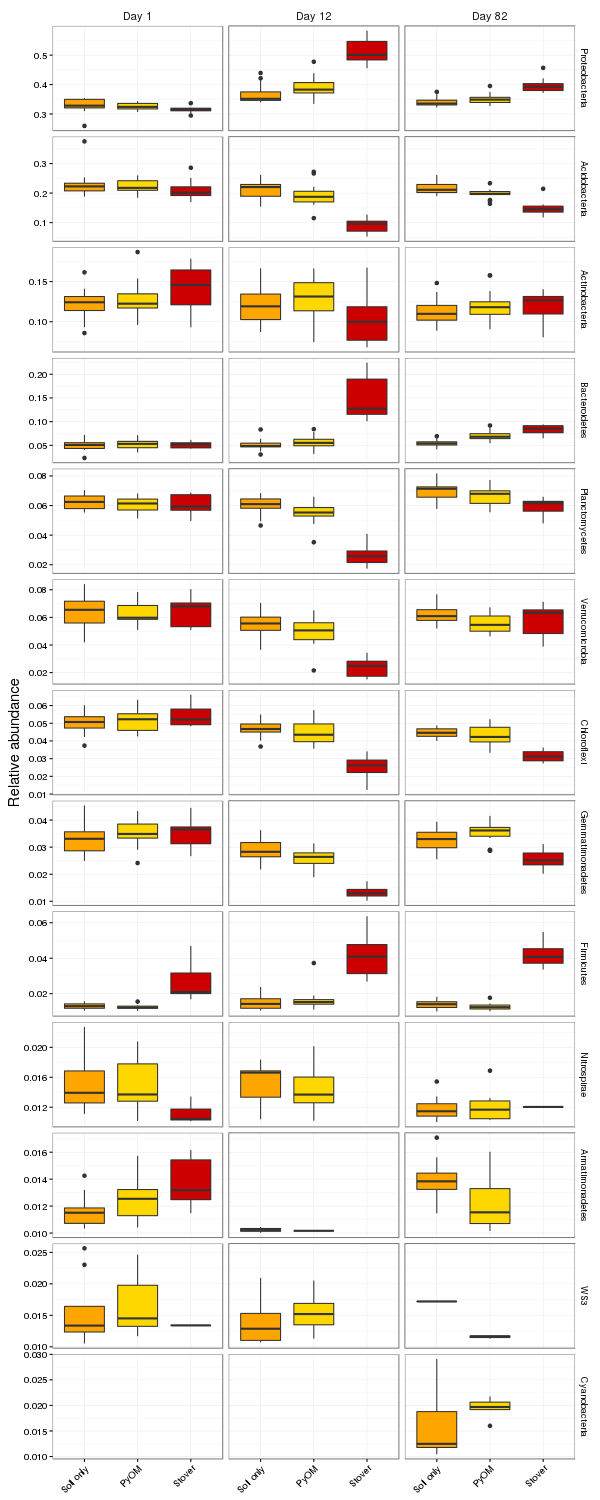

In [18]:
%%R -w 600 -h 1500

p = ggplot(d.plot, aes(Amdmt, Abundance, fill = Amdmt))

p = p + geom_boxplot()

p = p + facet_grid(~Phylum~Day, scales = "free_y")

p = p + scale_fill_manual(values=c("orange","gold1","red3"))

p = p + theme_bw()

p = p + guides(fill = "none")
p = p + theme(legend.position = "none")

p = p + theme(strip.text.x = element_text(size=11), 
              strip.text.y = element_text(size=9), 
                strip.background = element_rect(colour="white", fill="white"))

p = p + theme(axis.text.x = element_text(size = 9, angle = 45, hjust=1),axis.text.y = element_text(size = 9))
p = p + theme(axis.title.x = element_blank())
p = p + theme(axis.title.y = element_text(size = 15, vjust = 1))

p = p + labs(x="Amendment",y="Relative abundance")

p

In [80]:
%%R
ggsave(filename = "PhylumBox.pdf", plot = p, width=3, height = 15)

### Calculating fraction Gemmatimonadetes

In [40]:
%%R

RA = mdf %>%
    dplyr::group_by(Sample) %>%
    dplyr::mutate(Relabund = Abundance / sum(Abundance)) %>%
    dplyr::select(OTU,Day, Amdmt,Phylum,Order,Relabund)%>%
    dplyr::filter(Phylum=="Gemmatimonadetes")%>%
    dplyr::filter(Order=="Ellin5290")%>%
    dplyr::group_by()%>%
    dplyr::arrange(-Relabund)
RA

Source: local data frame [3,689 x 7]

   Sample     OTU   Day Amdmt           Phylum     Order    Relabund
    (chr)   (chr) (chr) (chr)           (fctr)    (fctr)       (dbl)
1    S034 OTU.246     0     1 Gemmatimonadetes Ellin5290 0.001445861
2    S007 OTU.246     0     1 Gemmatimonadetes Ellin5290 0.001346464
3    S032 OTU.574     0     1 Gemmatimonadetes Ellin5290 0.001277879
4    S018 OTU.246     0     0 Gemmatimonadetes Ellin5290 0.001228976
5    S014 OTU.574     0     1 Gemmatimonadetes Ellin5290 0.001149511
6    S041 OTU.246     0     2 Gemmatimonadetes Ellin5290 0.001145971
7    S012 OTU.246     0     1 Gemmatimonadetes Ellin5290 0.001122442
8    S003 OTU.246     0     0 Gemmatimonadetes Ellin5290 0.001116315
9    S222 OTU.909     2     1 Gemmatimonadetes Ellin5290 0.001080670
10   S044 OTU.574     0     2 Gemmatimonadetes Ellin5290 0.001065092
..    ...     ...   ...   ...              ...       ...         ...
